In [1]:
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [3]:
def searchFolders(path):
    subjFolders = os.listdir(path)
    eeglab = []
    for i in subjFolders:
        if '.DS_Store' not in i:
            eeglab.append(i)
    
    eeglab_dict = {}
    for folder in eeglab:
        folderPath = os.path.join(path,folder)
        contents = os.listdir(folderPath)
        eeglab_dict[folder] = [x for x in contents if '.set' in x]
    return eeglab_dict

In [4]:
path = '/Volumes/flash64/EEGLAB'
eeglab_dict = searchFolders(path)
print(eeglab_dict)

{'SA20131216': ['20131216_1310.set', '20131216_1441.set'], 'SA20140205': ['20140205_1114.set', '20140205_1230.set'], 'SA20140206': ['20140206_1029.set', '20140206_1151.set'], 'SA20140207': ['20140207_1146.set', '20140207_1219.set'], 'SA20140217': ['20140217_1136.set']}


In [5]:
# read file
np.random.seed(42)
eeglab_dict_keys = list(eeglab_dict.keys())
eeglab_folder = os.path.join(path,eeglab_dict_keys[1])

eeglab_file = os.path.join(eeglab_folder, eeglab_dict[eeglab_dict_keys[1]][1])
raw = mne.io.read_raw_eeglab(eeglab_file, preload=True, verbose = True)

Reading /Volumes/flash64/EEGLAB/SA20140205/20140205_1230.fdt
Reading 0 ... 838231  =      0.000 ...  1637.170 secs...


In [7]:
scalingDict=dict(mag=1e-12,grad=4e-11,eeg=20e-6,eog=150e-6,ecg=5e-4,emg=1e-3,ref_meg=1e-12,misc=1e-3,stim=1,resp=1,chpi=1e-4)

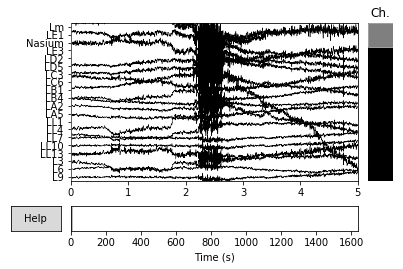

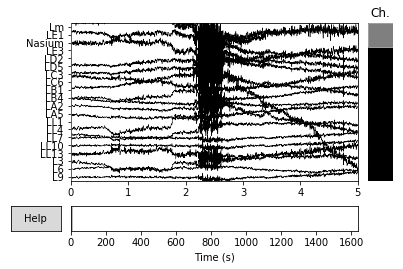

In [14]:
raw.plot(n_channels=20,scalings=scalingDict,duration=5)